<a href="https://www.kaggle.com/code/arnabmukherjee853/flight-cost-analysis?scriptVersionId=236421406" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-booking-information/Flight_Booking.csv


## Problem Statement.
1. Analysing data to find valuable insights about different flight and the prices wrt different given parameters.
2. Regression analysis to determine the flight price.
     

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading the data & collecting statistical inferences for analysis.

In [3]:
df=pd.read_csv('/kaggle/input/flight-booking-information/Flight_Booking.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


**Given Dataset doesnot contain any null values, but contains some unwanted features like 'Unnamed:0 ' and 'flight'**

In [6]:
df=df.drop(columns=['Unnamed: 0'])

In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df['days_left']=df['days_left'].astype('O')

In [9]:
df.describe()

,duration,price
count,300153.000000,300153.000000
mean,12.221021,20889.660523
std,7.191997,22697.767366
min,0.830000,1105.000000
25%,6.830000,4783.000000
50%,11.250000,7425.000000
75%,16.170000,42521.000000
max,49.830000,123071.000000


In [10]:
df.isna().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [11]:
df=df.drop(columns=['flight'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  object 
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 22.9+ MB


## Data analysis and visualization.

<Axes: >

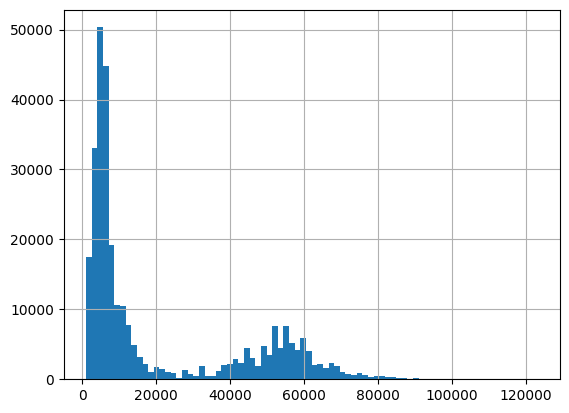

In [13]:
df.price.hist(bins=80)

**Price by AirLines.**

In [14]:
airline_Price=df.groupby(['airline'])['price'].mean().sort_values(ascending=False).reset_index()
airline_Price

,airline,price
0,Vistara,30396.536302
1,Air_India,23507.019112
2,SpiceJet,6179.278881
3,GO_FIRST,5652.007595
4,Indigo,5324.216303
5,AirAsia,4091.072742


While 'Vistara' and 'Air-India' runs the cosliest flights in india, 'Indigo' and 'AirAsia' runs the cheapest. 

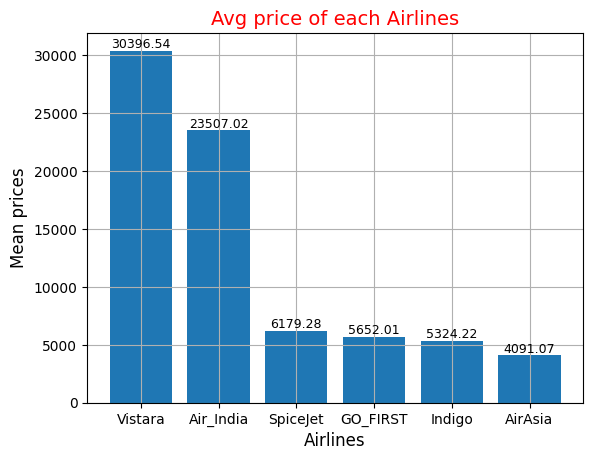

In [15]:
plt.bar(airline_Price['airline'],airline_Price['price'])
plt.title('Avg price of each Airlines',fontsize=14,color='red')
plt.xlabel('Airlines',fontsize=12)
plt.ylabel('Mean prices',fontsize=12)
plt.grid(True)
for index, value in enumerate(airline_Price['price']):
    plt.text(index,value,f'{value:.2f}',ha='center',va='bottom',fontsize=9)
plt.show()

****Price by Departure time****

In [16]:
airline_price_time=df.groupby(['departure_time'])['price'].mean().sort_values(ascending=False).reset_index()
airline_price_time

,departure_time,price
0,Night,23062.146808
1,Morning,21630.760254
2,Evening,21232.361894
3,Early_Morning,20370.676718
4,Afternoon,18179.203331
5,Late_Night,9295.299387


Late_Night flights are the cheapest while flights departing in the Morning and Night are the cosliest.

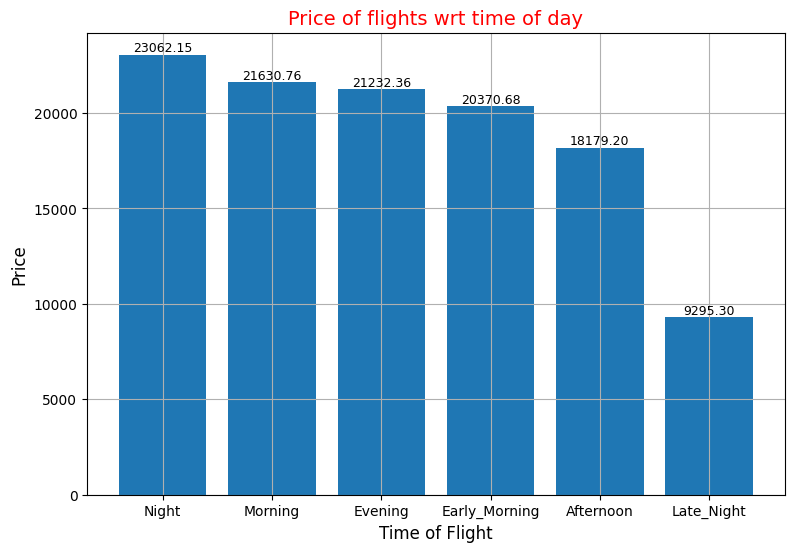

In [17]:
plt.figure(figsize=(9,6))
plt.bar(airline_price_time['departure_time'],airline_price_time['price'])
plt.title('Price of flights wrt time of day',fontsize=14,color='red')
plt.xlabel('Time of Flight',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.grid('True')
for i,v in enumerate(airline_price_time['price']):
    plt.text(i,v,f'{v:.2f}',ha='center',va='bottom',fontsize=9)
plt.show()

**Flight price wrt days left to journey**

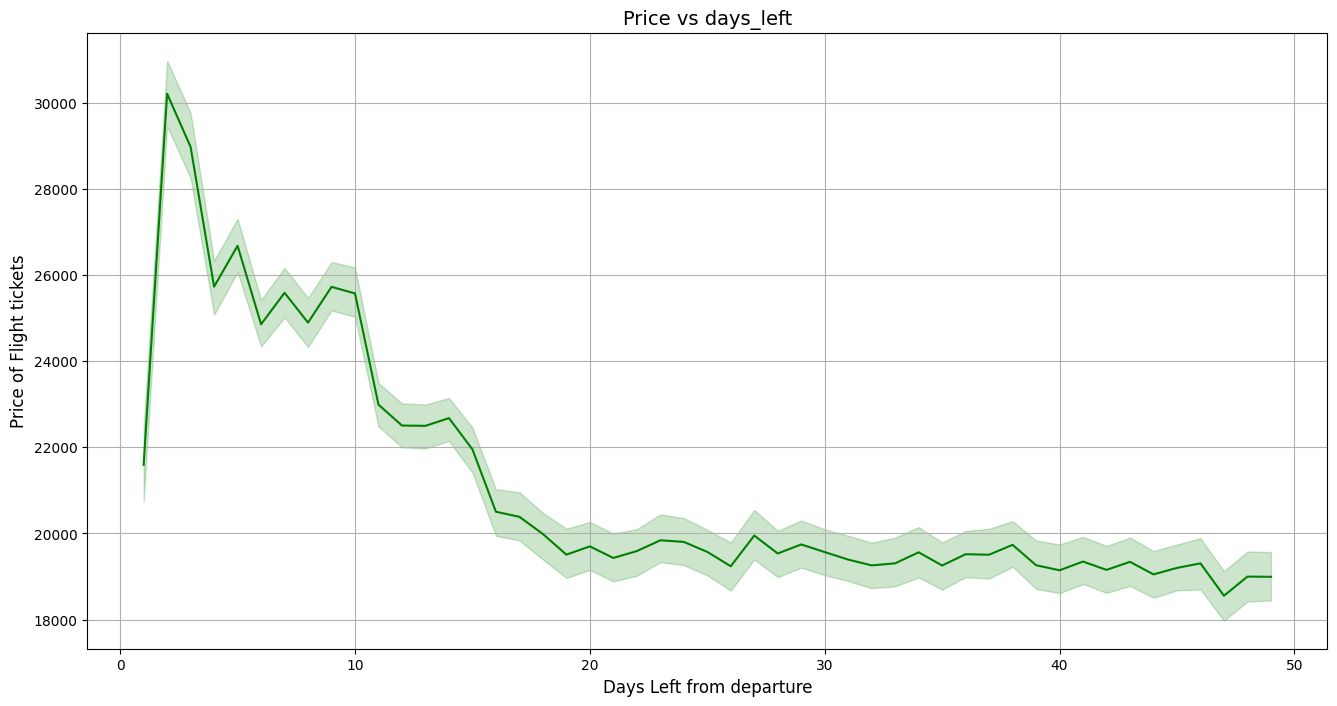

In [18]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df,x=df['days_left'],y=df['price'],color='green')
plt.title('Price vs days_left',fontsize=14)
plt.xlabel('Days Left from departure',fontsize=12)
plt.ylabel('Price of Flight tickets',fontsize=12)
plt.grid(True)

> If you book your flight just 1 to 10 days before your scheduled departure, you can expect to pay approximately 1.5 to 2 times the normal price.

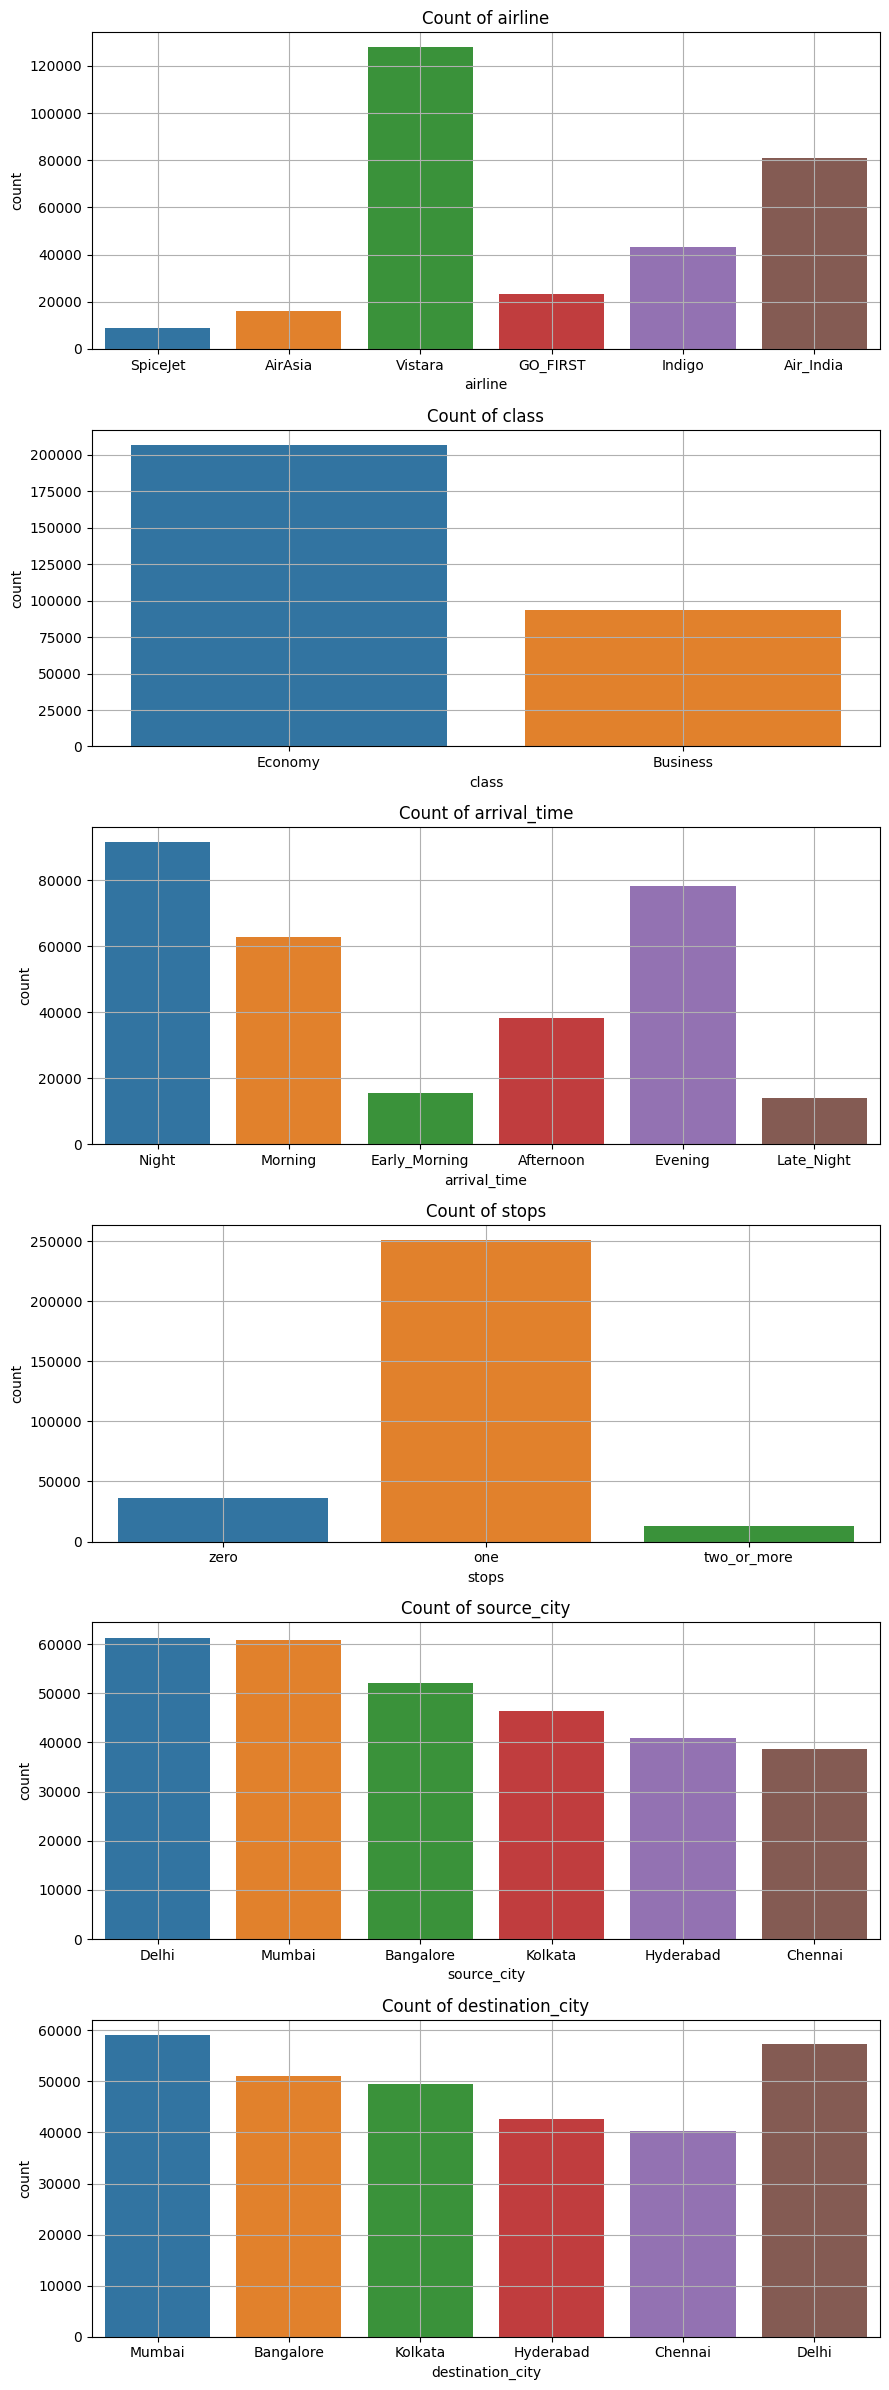

In [19]:
Ccol =['airline', 'class', 'arrival_time', 'stops', 'source_city', 'destination_city']
fig, axes = plt.subplots(nrows=len(Ccol),figsize=(9,4*len(Ccol)))
plt.subplots_adjust(hspace=0.25)
for i, col in enumerate(Ccol):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}') 
    axes[i].grid(True)
plt.tight_layout()
plt.show()

**Insights**
1. Vistara runs most number of flights followed by Air-India and Indigo.
2. Economy class flights are the most prevalent, with their volume exceeding that of business class flights by more than twofold.
3. Most flights runs at Night session followed by Evening and Morning sessi0ns.
4. One stop Flights are the most common of all.
5. Delhi and Mumbai being the Administrative capital and Business capital of India, most flights depart from these cities.
6. For the same reason Mumbai and Delhi also experience highest incoming flight traffic.


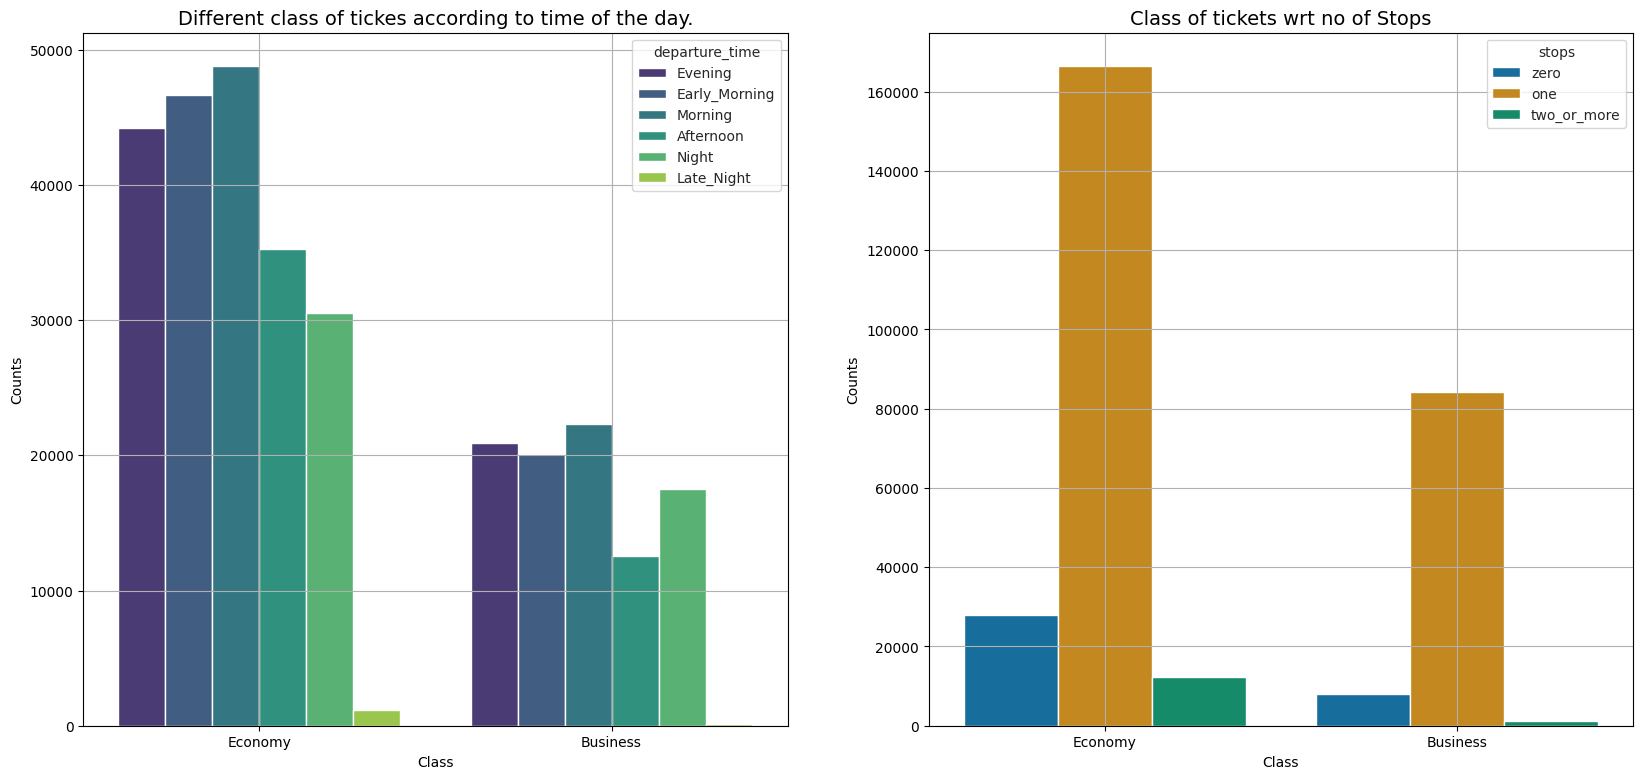

In [20]:
fig,(ax,ax1)=plt.subplots(ncols=2,figsize=(20,9))
sns.set_style('ticks')
sns.countplot(data=df,x=df['class'],hue='departure_time',ax=ax,palette='viridis')
ax.set_xlabel('Class')
ax.set_ylabel('Counts')
ax.set_title('Different class of tickes according to time of the day.',fontsize=14)
ax.grid(True)
sns.countplot(data=df,x=df['class'],hue='stops',ax=ax1,palette='colorblind')
ax1.set_xlabel('Class')
ax1.set_ylabel('Counts')
ax1.set_title('Class of tickets wrt no of Stops',fontsize=14)
plt.grid(True)

**Insights**
1. No business class flight runs in Late-night.
2. Highest no of flight traffic was observed during morning times in both classes(Economy and Business)
3. The number of economy class flights is roughly twice that of business class flights.
1.  Flights with one stop are the most common in all claasses of flights.
2.  The no of one stop flights in economy class is approximately double that of business class.

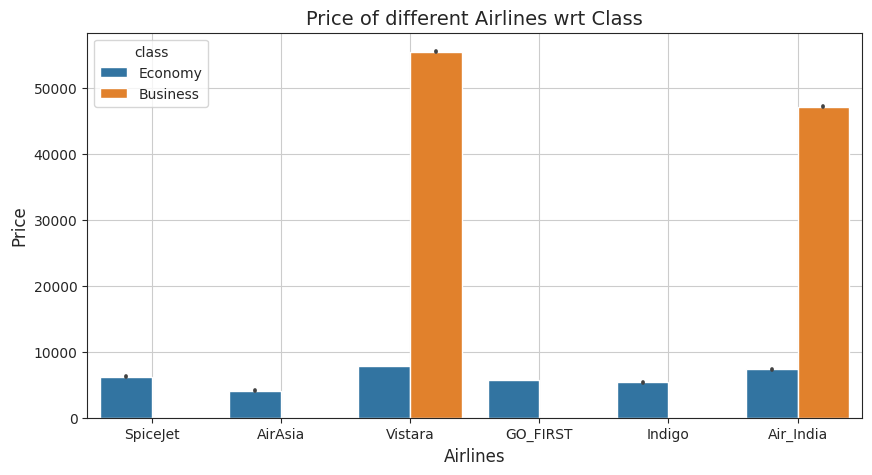

In [21]:
fig,ax=plt.subplots(figsize=(10,5))
color_airline = sns.color_palette(as_cmap=True)
color_class = sns.color_palette('colorblind')
sns.barplot(data=df,x=df['airline'],y=df['price'],hue='class',ax=ax, palette=color_airline)
ax.set_xlabel('Airlines',fontsize=12)
ax.set_ylabel('Price',fontsize=12)
ax.set_title('Price of different Airlines wrt Class',fontsize=14)
ax.grid(True)
plt.show()

> Only Vistara and Air_India runs both Economy and Business class flights.

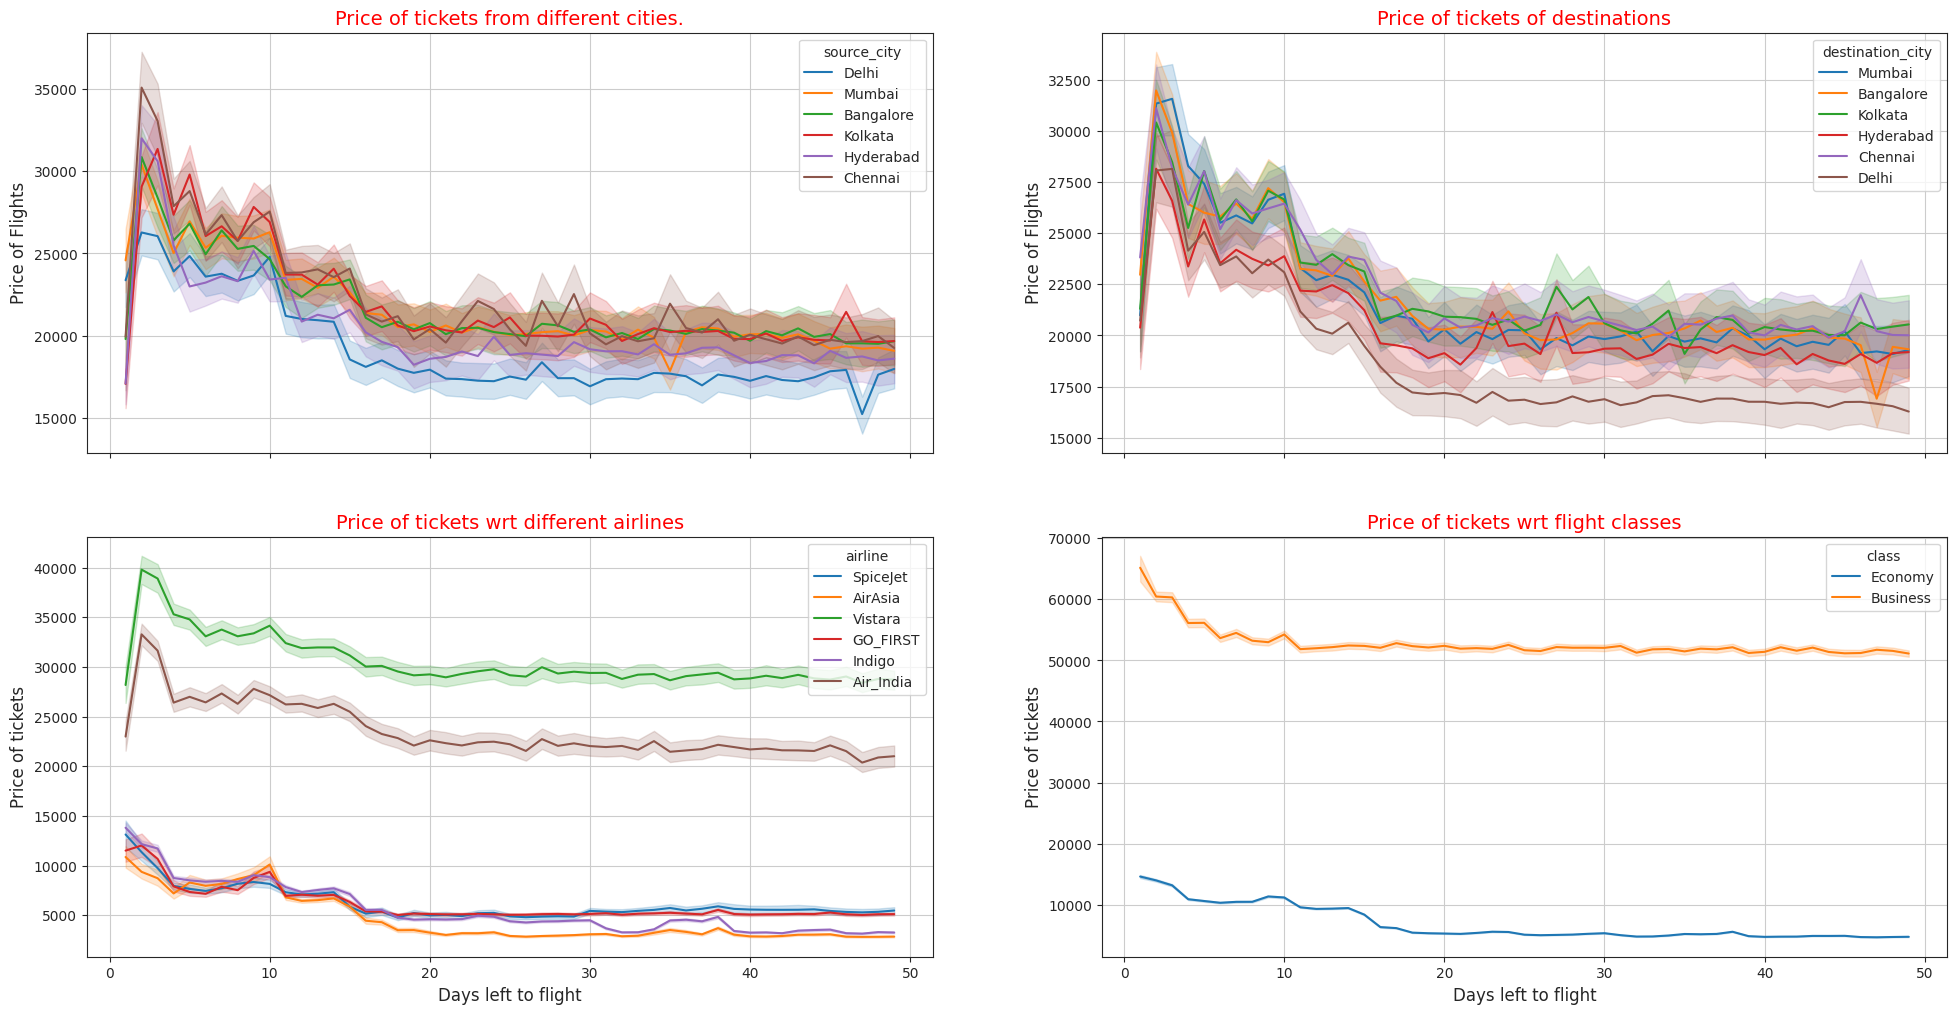

In [22]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(24,12),sharex=True)
sns.lineplot(data=df,ax=axs[0,0],x=df['days_left'],y=df['price'],hue='source_city')
sns.lineplot(data=df,ax=axs[0,1],x=df['days_left'],y=df['price'],hue='destination_city')
sns.lineplot(data=df,ax=axs[1,0],x=df['days_left'],y=df['price'],hue='airline')
sns.lineplot(data=df,ax=axs[1,1],x=df['days_left'],y=df['price'],hue='class')
axs[0,0].set_title('Price of tickets from different cities.',fontsize=14,color='red')
axs[0,1].set_title('Price of tickets of destinations',fontsize=14,color='red')
axs[1,0].set_title('Price of tickets wrt different airlines',fontsize=14,color='red')
axs[1,1].set_title('Price of tickets wrt flight classes',fontsize=14,color='red')
axs[0,0].set_xlabel('Days left to Flight',fontsize=12)
axs[0,1].set_xlabel('Days left to Flight',fontsize=12)
axs[1,0].set_xlabel('Days left to flight',fontsize=12)
axs[1,1].set_xlabel('Days left to flight',fontsize=12)
axs[0,0].set_ylabel('Price of Flights',fontsize=12)
axs[0,1].set_ylabel('Price of Flights',fontsize=12)
axs[1,0].set_ylabel('Price of tickets',fontsize=12)
axs[1,1].set_ylabel('Price of tickets',fontsize=12)
axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)

**Insights**
1. Flights from Chennai are costliest while from Delhi it is the cheapest.
2. Flights towards Bangalore are the cosliest while towards Delhi is the cheapest.
3. Vistara and Air-India runs the costliest flights, while AirAsia runs the cheapst.

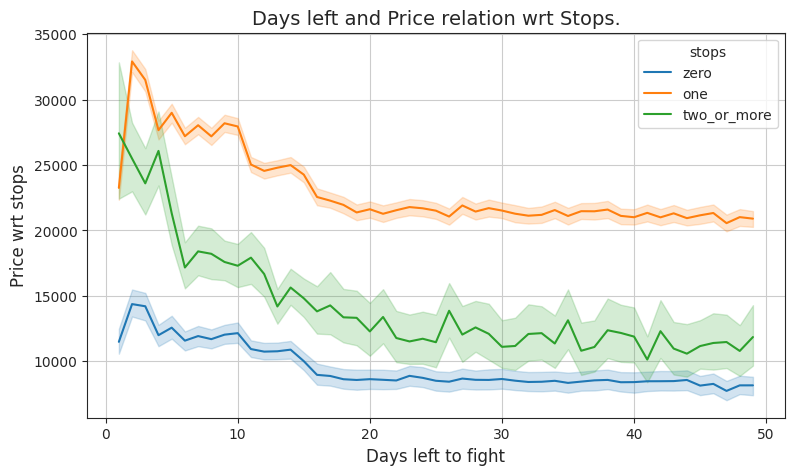

In [23]:
fig,ax=plt.subplots(figsize=(9,5))
sns.lineplot(data=df,ax=ax,x=df['days_left'],y=df['price'],hue=df['stops'])
ax.set_title('Days left and Price relation wrt Stops.',fontsize=14)
ax.set_xlabel('Days left to fight',fontsize=12)
ax.set_ylabel('Price wrt stops',fontsize=12)
plt.grid(True)

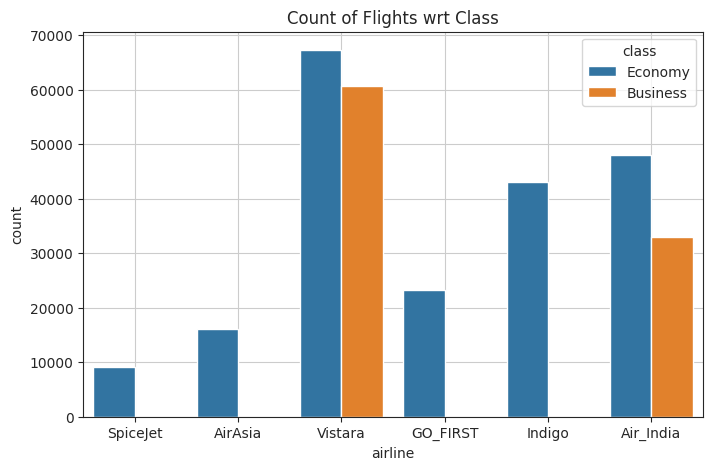

In [24]:
plt.figure(figsize =(8,5))
sns.countplot(data=df,x=df['airline'],hue='class')
plt.title('Count of Flights wrt Class')
plt.grid(True)

**Pie chart to visualise the percentage of each classes in categorical features.**

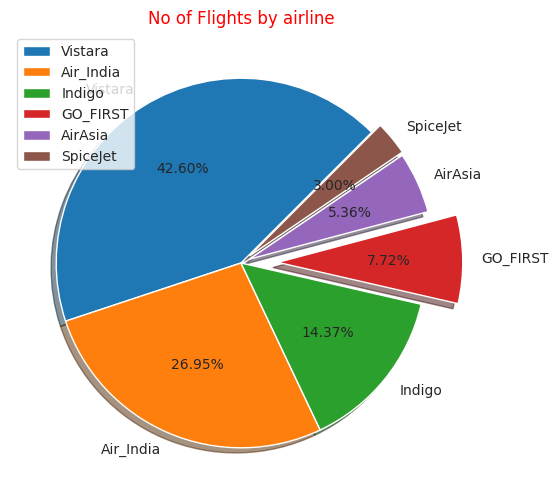

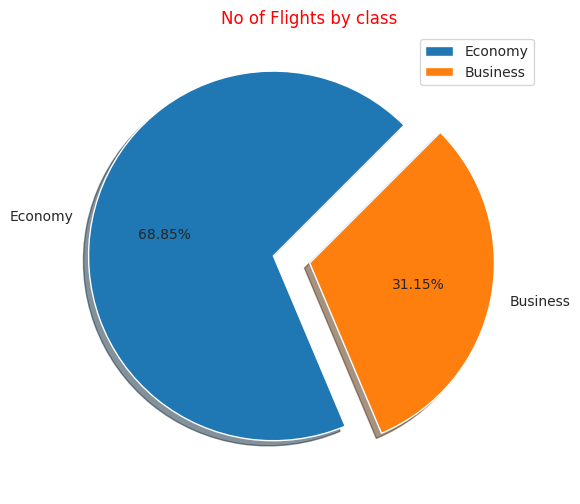

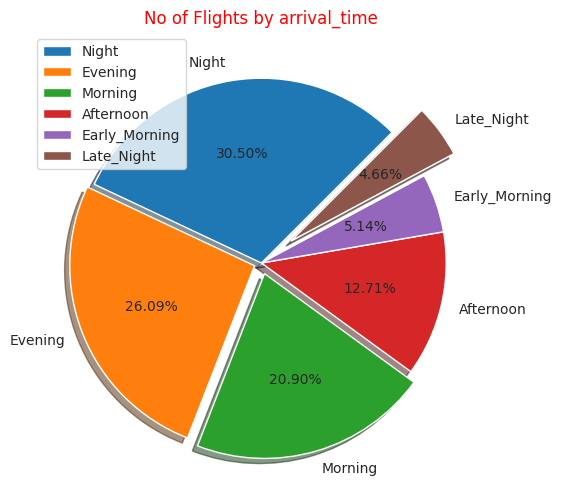

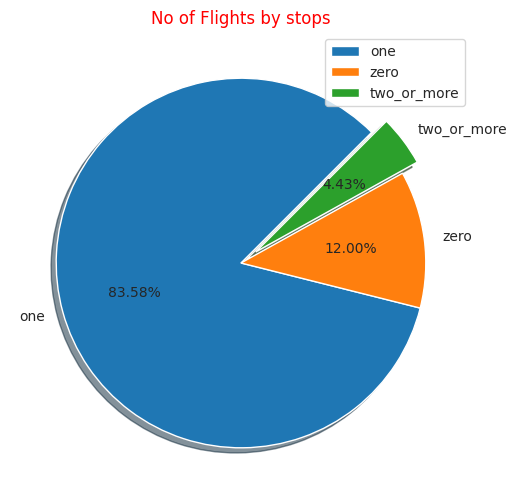

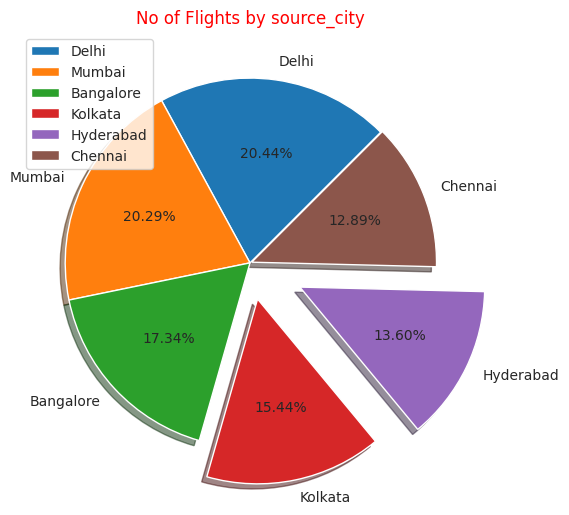

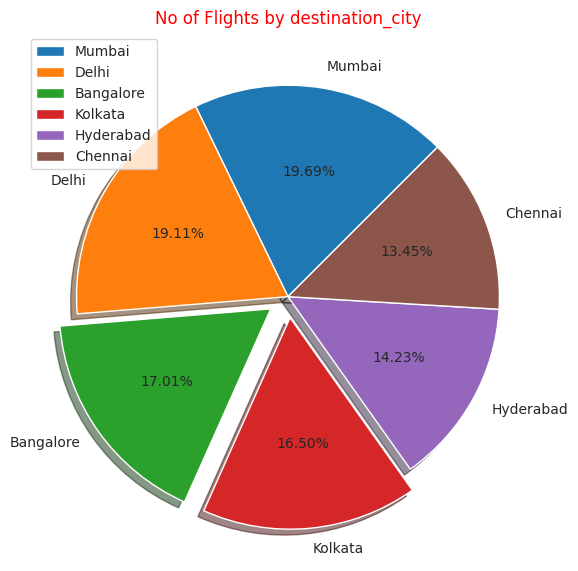

In [25]:
list1=['airline','class','arrival_time','stops','source_city','destination_city']
my_explode=[[0,0,0,.2,0.05,0.06],[.2,0],[0,.04,.06,0,0,.2],[0,0,.1],[0,0,0,.2,.3,.01],[0,0,.1,.1,0,0]]
for i, col in enumerate(list1):
    counts = df[col].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=counts.index,autopct='%1.2f%%',startangle=45,shadow=True,explode=my_explode[i])
    plt.title(f'No of Flights by {col}',color='red')
    plt.legend(loc='best')
    
plt.tight_layout()
plt.show()

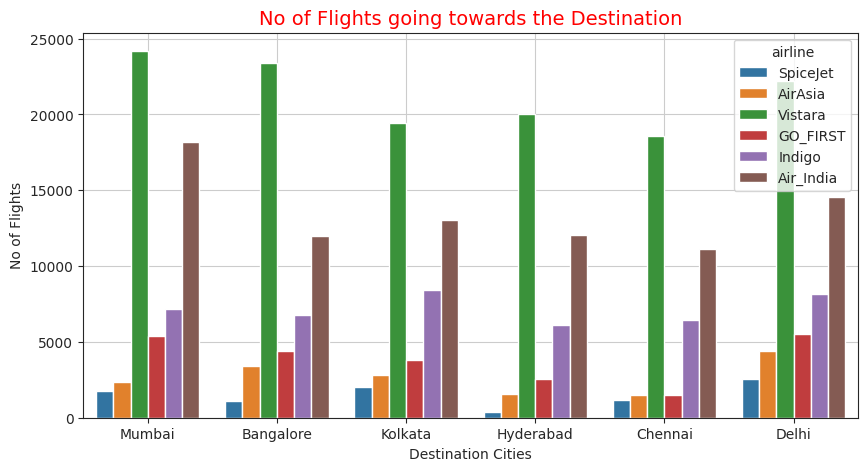

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='destination_city',hue='airline')
plt.title('No of Flights going towards the Destination',fontsize=14,color='red')
plt.xlabel('Destination Cities')
plt.ylabel('No of Flights')
plt.grid(True)

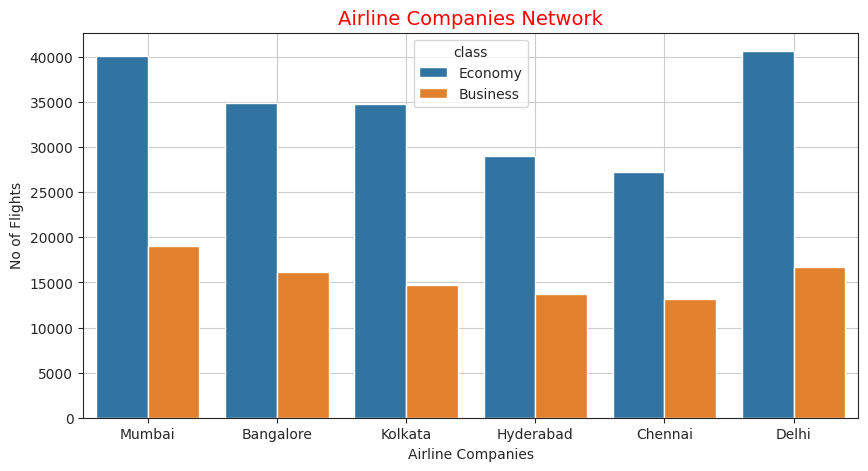

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='destination_city',hue='class')
plt.title('Airline Companies Network',fontsize=14,color='red')
plt.xlabel('Airline Companies')
plt.ylabel('No of Flights')
plt.grid(True)

**Taking random 200k data for less computation time**

In [28]:
df1= df.sample(200000)
df1.shape

(200000, 10)

**Breaking the dataset into dependent and independent features**

In [29]:
X = df1.drop(columns=['price'])
y = df1['price']
print(X.shape)
print(y.shape)

(200000, 9)
(200000,)


In [30]:
from sklearn.preprocessing import OneHotEncoder
OE=OneHotEncoder(sparse_output=False)
cat_col = df.select_dtypes(include=['O']).columns.tolist()
cat_col

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'days_left']

## Pipeline building for custom data handling and trtansformation.

In [31]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import PowerTransformer,OneHotEncoder,OrdinalEncoder

In [32]:
Pipeline_num = Pipeline(
steps=[('BoxCox', PowerTransformer(method='box-cox',standardize=True))])

Pipeline_cat = Pipeline(
steps=[('Union',
        FeatureUnion(
            transformer_list=[('Nominal',
                                ColumnTransformer([('OneHotEncoder',
                                                    OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
                                                    ['airline','source_city','destination_city'])],remainder='drop')),
                                       
                              ('Ordinal',
                               ColumnTransformer([('OrdinalEncoder',
                                                    OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),
                                                    ['departure_time','stops','arrival_time','class','days_left'])],remainder='drop'))]))])
CT = make_column_transformer(
(Pipeline_num,['duration']),
(Pipeline_cat,['airline','source_city','departure_time','stops','arrival_time','destination_city','class','days_left']),
remainder='drop')
CT

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('BoxCox',
                                                  PowerTransformer(method='box-cox'))]),
                                 ['duration']),
                                ('pipeline-2',
                                 Pipeline(steps=[('Union',
                                                  FeatureUnion(transformer_list=[('Nominal',
                                                                                  ColumnTransformer(transformers=[('OneHotEncoder',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse_output=False),
                                                                                                                   ['airline',
                                                                                                                    'source_city',
                                                                                                                    'destination_city'])])),
                                                                                 ('Ordinal',
                                                                                  ColumnTransformer(transformers=[('OrdinalEncoder',
                                                                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                                  unknown_value=-1),
                                                                                                                   ['departure_time',
                                                                                                                    'stops',
                                                                                                                    'arrival_time',
                                                                                                                    'class',
                                                                                                                    'days_left'])]))]))]),
                                 ['airline', 'source_city', 'departure_time',
                                  'stops', 'arrival_time', 'destination_city',
                                  'class', 'days_left'])])

## Splitting the dataset into Training and Testing dataset.

In [33]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=13)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(160000, 9)
(40000, 9)
(160000,)
(40000,)


**Applying Supervised learning MLs**

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [35]:
alpha_range = {'model__alpha': [0.001,0.01,0.1,1,10,100]}

**List of regression models to test on data**

In [36]:
models= {'Linear_Regression':Pipeline([('transformer',CT),('model',LinearRegression())]),
         'DecisionTreeRegressor':Pipeline([('transformer',CT),('model',DecisionTreeRegressor(criterion='absolute_error',))]),
         'GridSearchCV':GridSearchCV(estimator=Pipeline([('transformer',CT),('model',Ridge(random_state=13))]),param_grid=alpha_range,cv=5,),
         'RandomizedSCV':RandomizedSearchCV(estimator=Pipeline([('transformer',CT),('model',Ridge(random_state=13))]),param_distributions=alpha_range,cv=5)
        }
#'RandomForestRegressor':Pipeline([('transformer',CT),('model',RandomForestRegressor(n_estimators=150,criterion='absolute_error',random_state=42))])

In [37]:
models.items()

dict_items([('Linear_Regression', Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('BoxCox',
                                                                   PowerTransformer(method='box-cox'))]),
                                                  ['duration']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Union',
                                                                   FeatureUnion(transformer_list=[('Nominal',
                                                                                                   ColumnTransformer(transformers=[('OneHotEncoder',
                                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                    

## Model training and Evaluation using various metrics.

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
for model_name,model in models.items():
    print(f'Fitting Model: {model_name}')
    
    if isinstance(model,(GridSearchCV,RandomizedSearchCV)):
        model.fit(Xtrain,ytrain)
        best_model = model.best_estimator_
        print(f"Best parameters for {model_name}: {model.best_params_}")
    else :
        best_model=model
        best_model.fit(Xtrain,ytrain)
    
    best_model.fit(Xtrain,ytrain)
    Y_pred = best_model.predict(Xtest)
    difference_table = pd.DataFrame(np.c_[ytest,Y_pred],columns=['Actual','Predicted'])
    print(f'R2 Score of {model_name} is : {r2_score(ytest,Y_pred)}')
    print(f'Mean Absolute Error of {model_name} is : {mean_absolute_error(ytest,Y_pred)}')
    print(f'Mean Absolute Percentage Error of {model_name} is : {mean_absolute_percentage_error(ytest,Y_pred)}')
    print(f'Mean Squared Error of {model_name} is : {mean_squared_error(ytest,Y_pred)}')
    print(f'Root Mean Squared Error of {model_name} is : {np.sqrt(mean_squared_error(ytest,Y_pred))}')
    difference_table['Difference'] = abs(difference_table['Actual']-difference_table['Predicted'])
    print(difference_table)
    print('****'*12)
    print('****'*12)
    print('    ')

Fitting Model: Linear_Regression
R2 Score of Linear_Regression is : 0.9084592420863319
Mean Absolute Error of Linear_Regression is : 4613.088698584356
Mean Absolute Percentage Error of Linear_Regression is : 0.44412978402943265
Mean Squared Error of Linear_Regression is : 47611074.856979184
Root Mean Squared Error of Linear_Regression is : 6900.077887747296
        Actual     Predicted   Difference
0       4971.0   8883.000499  3912.000499
1       7468.0   7800.941504   332.941504
2       6845.0   8062.347789  1217.347789
3      14388.0   8151.468832  6236.531168
4       4637.0  11420.406466  6783.406466
...        ...           ...          ...
39995   3992.0   4977.545253   985.545253
39996   6461.0   8337.122881  1876.122881
39997  10783.0  11648.204441   865.204441
39998  57057.0  55659.714595  1397.285405
39999  51384.0  51786.663104   402.663104

[40000 rows x 3 columns]
************************************************
************************************************
    
Fitting

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for RandomizedSCV: {'model__alpha': 1}
R2 Score of RandomizedSCV is : 0.9084590821414327
Mean Absolute Error of RandomizedSCV is : 4613.112134178942
Mean Absolute Percentage Error of RandomizedSCV is : 0.444132967057104
Mean Squared Error of RandomizedSCV is : 47611158.04559097
Root Mean Squared Error of RandomizedSCV is : 6900.083915836891
        Actual     Predicted   Difference
0       4971.0   8883.759722  3912.759722
1       7468.0   7801.693432   333.693432
2       6845.0   8062.982547  1217.982547
3      14388.0   8152.175107  6235.824893
4       4637.0  11421.112818  6784.112818
...        ...           ...          ...
39995   3992.0   4977.530593   985.530593
39996   6461.0   8337.852938  1876.852938
39997  10783.0  11648.992954   865.992954
39998  57057.0  55658.713890  1398.286110
39999  51384.0  51785.814315   401.814315

[40000 rows x 3 columns]
************************************************
************************************************
    


**Using Neural Network**

In [39]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
print(tf.__version__)

2.12.0


In [40]:
transformed_data = CT.fit_transform(df)
X = transformed_data
y = df.price
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.22,random_state=42)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(234119, 24)
(234119,)
(66034, 24)
(66034,)


In [41]:
Xtrain.shape[1]

24

In [42]:
import random
seed_value = 13
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

## ANN Regression model building

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape= (Xtrain.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(.15),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(.15),
    tf.keras.layers.Dense(850,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(.15),
    tf.keras.layers.Dense(1)])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3200      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 850)               4

## ANN Regression model training

In [45]:
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',
                           verbose=2,
                           patience=10,
                           restore_best_weights=True,)

adam = tf.keras.optimizers.Adam(learning_rate=0.015)

opt = model.compile(optimizer='adam',
                   loss='mse',)

ANN_regressor = model.fit(X, y, validation_data=(Xtest,ytest), epochs=70, batch_size=150, callbacks=[early_stop])

Epoch 1/70
2002/2002 [==============================] - 12s 4ms/step - loss: 75947568.0000 - val_loss: 24228292.0000
Epoch 2/70
2002/2002 [==============================] - 8s 4ms/step - loss: 29722884.0000 - val_loss: 22761990.0000
Epoch 3/70
2002/2002 [==============================] - 8s 4ms/step - loss: 26196036.0000 - val_loss: 21848512.0000
Epoch 4/70
2002/2002 [==============================] - 8s 4ms/step - loss: 24459738.0000 - val_loss: 22023076.0000
Epoch 5/70
2002/2002 [==============================] - 8s 4ms/step - loss: 23416726.0000 - val_loss: 26929446.0000
Epoch 6/70
2002/2002 [==============================] - 8s 4ms/step - loss: 22726536.0000 - val_loss: 24197778.0000
Epoch 7/70
2002/2002 [==============================] - 8s 4ms/step - loss: 22087614.0000 - val_loss: 19736456.0000
Epoch 8/70
2002/2002 [==============================] - 8s 4ms/step - loss: 21632102.0000 - val_loss: 18122490.0000
Epoch 9/70
2002/2002 [==============================] - 8s 4ms/step - l

In [46]:
print("Train Score",model.evaluate(Xtrain,ytrain))
print("Test Score",model.evaluate(Xtest,ytest))

7317/7317 [==============================] - 14s 2ms/step - loss: 12819335.0000
Train Score 12819335.0
2064/2064 [==============================] - 4s 2ms/step - loss: 12843334.0000
Test Score 12843334.0


**Neural Network model performance**

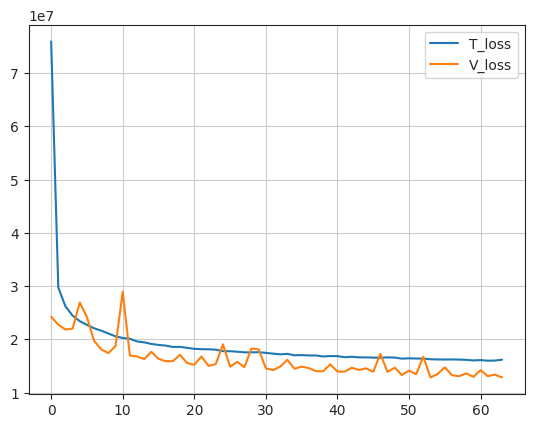

In [47]:
plt.plot(ANN_regressor.history['loss'], label='T_loss')
plt.plot(ANN_regressor.history['val_loss'], label='V_loss')
plt.legend()
plt.grid(True)

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

y_pred = model.predict(Xtest)
r2 = r2_score(ytest, y_pred)
print("Goodness of fit R² Score:", r2)
print("Mean Absolute Error: ",mean_absolute_error(ytest,y_pred))
print("Mean Absolute Percent Error: ",mean_absolute_percentage_error(ytest,y_pred))

2064/2064 [==============================] - 3s 1ms/step
Goodness of fit R² Score: 0.9751310456223268
Mean Absolute Error:  1973.8590426701644
Mean Absolute Percent Error:  0.14225222612437952


In [49]:
difference_table = pd.DataFrame(np.c_[ytest,y_pred],columns=['Actual','Predicted'])
difference_table['Difference'] = abs(difference_table['Actual']-difference_table['Predicted'])
difference_table

,Actual,Predicted,Difference
0,7366.0,5350.973145,2015.026855
1,64831.0,69842.367188,5011.367188
2,6195.0,7192.888184,997.888184
3,60160.0,58561.722656,1598.277344
4,6578.0,5962.245117,615.754883
...,...,...,...
66029,51819.0,52868.156250,1049.156250
66030,60508.0,63194.367188,2686.367188
66031,57565.0,59151.593750,1586.593750
66032,49613.0,48597.031250,1015.968750


## Predict using the model

In [50]:
sample = pd.DataFrame([{
    'airline': 'Indigo',
    'source_city': 'Kolkata',
    'departure_time': 'Morning',
    'stops': 'zero',
    'arrival_time': 'Morning',
    'destination_city': 'Delhi',
    'class': 'Economy',
    'duration': 2.5,          
    'days_left': '10'
}])
sample.dtypes

airline              object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left            object
dtype: object

* User input values of each features should be alligned with the type of transformation and the type of data we handled in Column Transformer. Like in this Column Transformer pipeline CT, we consider all features except 'duration' as categories, and 'duration' as numeric, hence we find all features as 'object' and duration as 'float'. 

In [51]:
sample

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Indigo,Kolkata,Morning,zero,Morning,Delhi,Economy,2.5,10


In [52]:
sample_transformed = CT.transform(sample)
sample_transformed

array([[-1.6406768,  0.       ,  0.       ,  0.       ,  1.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  1.       ,  0.       ,  0.       ,  0.       ,
         1.       ,  0.       ,  0.       ,  0.       ,  4.       ,
         2.       ,  4.       ,  1.       , -1.       ]])

In [53]:
prediction = model.predict(sample_transformed)
print("Predicted price:", prediction[0][0])

1/1 [==============================] - 0s 21ms/step
Predicted price: 9742.749


## Conclusion

The ANN model estimated the price for a 2.5-hour direct flight in Economy class with Indigo Airlines, traveling from Kolkata to Delhi in the morning, 10 days before departure, at Rs. 8721. The prediction is expected to have an average deviation of approximately 14.7% from the actual price in both sides positive or negative, indicating the model’s accuracy and potential variability in fare pricing.